Exploring Features of NLTK Library

import required libraries

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

open text file for processing

In [20]:
input_txt_file=open('sample_txt.txt')
input_txt=input_txt_file.read()
print(type(input_txt))
print(len(input_txt))
print(input_txt)

<class 'str'>
737
Natural Language Processing (NLP) is a field of artificial intelligence focused on enabling computers to understand, analyze, and generate human language. It involves preprocessing text by breaking it into smaller units (tokenization), identifying grammatical components (part of speech tagging), and extracting meaningful entities (named entity recognition). NLP also encompasses semantic analysis to understand context and sentiment, machine translation, text generation, question answering, and topic modeling. Techniques like machine learning and deep learning, employing neural networks and transformers, are often used to achieve these tasks, enhancing computers' ability to comprehend and interact with human language effectively.


Tokenization

Sentence Tokenization

In [21]:
sentences=sent_tokenize(input_txt)
print(len(sentences))
sentences

4


['Natural Language Processing (NLP) is a field of artificial intelligence focused on enabling computers to understand, analyze, and generate human language.',
 'It involves preprocessing text by breaking it into smaller units (tokenization), identifying grammatical components (part of speech tagging), and extracting meaningful entities (named entity recognition).',
 'NLP also encompasses semantic analysis to understand context and sentiment, machine translation, text generation, question answering, and topic modeling.',
 "Techniques like machine learning and deep learning, employing neural networks and transformers, are often used to achieve these tasks, enhancing computers' ability to comprehend and interact with human language effectively."]

Word Tokenization

In [22]:
words_tokenized=word_tokenize(input_txt)
print(len(words_tokenized))
words_tokenized[:10]

119


['Natural',
 'Language',
 'Processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of']

frequency distribution

In [23]:
fdist=FreqDist(words_tokenized)
fdist.most_common(10)

[(',', 11),
 ('and', 7),
 ('(', 4),
 (')', 4),
 ('to', 4),
 ('.', 4),
 ('NLP', 2),
 ('of', 2),
 ('computers', 2),
 ('understand', 2)]

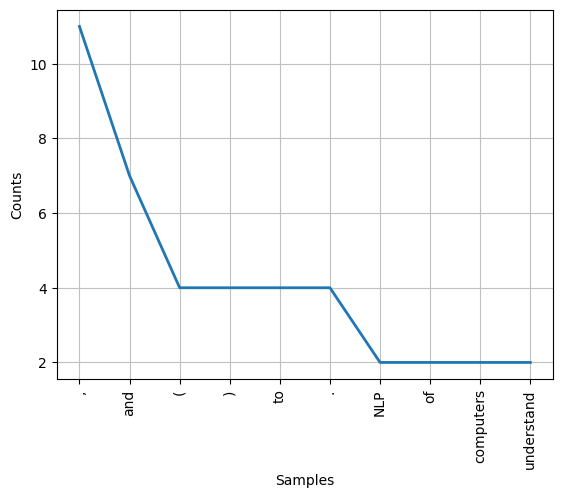

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
# plt.figure(figsize=(10,6),facecolor='pink')
fdist.plot(10)

Remove Punctuaution Marks

In [25]:
text_without_punc=[]
for letters in words_tokenized:
    if letters.isalpha():
      text_without_punc.append(letters)
print(text_without_punc[:15])
print(len(text_without_punc))

['Natural', 'Language', 'Processing', 'NLP', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'focused', 'on', 'enabling', 'computers', 'to']
95


In [26]:
fdist=FreqDist(text_without_punc)
fdist.most_common(10)

[('and', 7),
 ('to', 4),
 ('NLP', 2),
 ('of', 2),
 ('computers', 2),
 ('understand', 2),
 ('human', 2),
 ('language', 2),
 ('text', 2),
 ('machine', 2)]

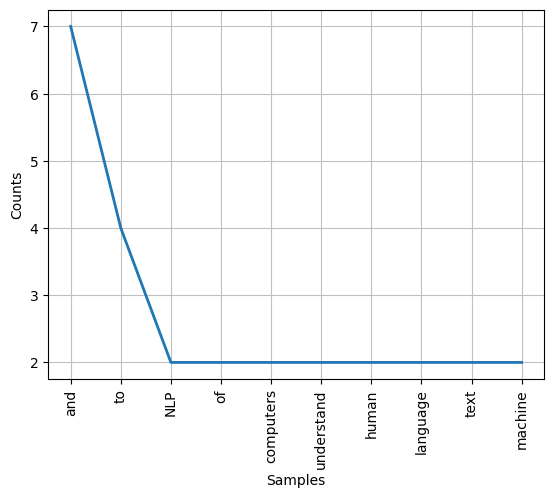

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
fdist.plot(10)

WordCLoud

(-0.5, 399.5, 199.5, -0.5)

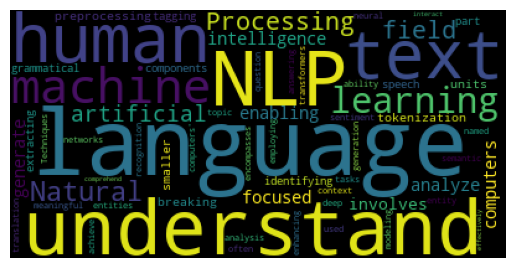

In [28]:
wordcloud=WordCloud().generate(input_txt)
plt.imshow(wordcloud)
plt.axis('off')

Stemming

In [29]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
y=['study','studying','studies']
for i in y:
    print(ps.stem(i))

studi
studi
studi


In [30]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
y=['chocolates', 'chocolatey', 'choco']
for i in y:
    print(ps.stem(i))

chocol
chocolatey
choco


Lemmetization

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
l=WordNetLemmatizer()
y=['study','studying','studies']
for w in y:
    print(l.lemmatize(w))

study
studying
study


In [ ]:
print(l.lemmatize('studying',pos="v"))
print(l.lemmatize('leaves'))

study
leaf


Pos Tagging(Parts of speech)

In [ ]:
tag=nltk.pos_tag(['studying','study'])
print(tag)

[('studying', 'VBG'), ('study', 'NN')]


In [35]:
for words in words_tokenized:
    tagged_words=nltk.pos_tag(words_tokenized)
tagged_words[:10]

[('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('(', '('),
 ('NLP', 'NNP'),
 (')', ')'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('field', 'NN'),
 ('of', 'IN')]

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Chunking

In [39]:
grammar="NP:{<DT>?<JJ>*<NN>}"
""" DT represents determiner
    JJ represents adjectives
    NN represents singular or mass noun"""
parser=nltk.RegexpParser(grammar)
output=parser.parse(tagged_words)
print(output[:10])
output.draw()
# output.show()

[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), Tree('NP', [('a', 'DT'), ('field', 'NN')]), ('of', 'IN'), Tree('NP', [('artificial', 'JJ'), ('intelligence', 'NN')])]


Chinking

Regular Expression

In [53]:
text = '''
Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
BMW's gross cost of operating vehicles in fy2021 S1 was $8 billion.
'''

In [54]:
import re

In [55]:
pattern='FY\d{4} [A-Z0-9]*'
x=re.findall(pattern,text,flags=re.IGNORECASE)
print(x)

['FY2021 Q1', 'fy2021 S1']


In [57]:
pattern='\$[\d\.]+'
x=re.findall(pattern,text)
print(x)

['$4.85', '$8']


In [71]:
pattern='(FY\d{4} [A-Z][0-9]) [^\$]* (\$[\d\.]*)'
x=re.findall(pattern,text,flags=re.IGNORECASE)
print(x)

[('FY2021 Q1', '$4.85'), ('fy2021 S1', '$8')]
